**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Handling the data](#toc2_)    
  - 2.1. [Creating the main dataset ](#toc2_1_)  
  - 2.2. [Creating the second dataset](#toc2_2_) 
    - 2.2.1 [Cleaning the second dataset](#toc2_2_1_)     
    - 2.2.2 [Melting to get one line = one individual in the second dataset](#toc2_2_2_)  
    - 2.2.3 [Creating an id for each member in the household](#toc2_2_3_)   
    - 2.2.4 [Merging the melted datasets](#toc2_2_4_)   
    - 2.2.5 [Cleaning the merged data](#toc2_2_5_)
  - 2.3. [Merging the main and second dataset](#toc2_3_)  
  - 2.4. [Cleaning the final datasframe](#toc2_4_)   
- 3. [Describing](#toc3_) 
  - 3.1 [Share of women headed households](#toc3_1_)
  - 3.2 [Distribution of daily expenses](#toc3_2_) 
    - 3.2.1 [Distribution of daily expenses adjusted ](#toc3_2_1_) 
    - 3.2.2 [Distribution of daily expenses adjusted across gender of household head ](#toc3_2_2_) 
    - 3.2.3 [Distribution of daily expenses adjusted across gender of household head controlling the number of members in household](#toc3_2_3_) 
    - 3.2.4 [Distribution of daily expenses adjusted : Statistics ](#toc3_2_4_) 

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
# importing everything needed for this notebook : 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import os 

In [2]:
# check that paths exist on computer : (import your own here)
assert os.path.isdir('/Users/boisserielouise/Desktop/Magistère 2ème année/S2/Intro to Programming/Projects/Data Project/data/') 
assert os.path.isfile('/Users/boisserielouise/Desktop/Magistère 2ème année/S2/Intro to Programming/Projects/Data Project/data/base_menage_anonyme.dta')

# print everything in data : 
os.listdir('/Users/boisserielouise/Desktop/Magistère 2ème année/S2/Intro to Programming/Projects/Data Project/data/')

['.DS_Store', 'base_menage_anonyme.dta']

In [3]:
# open the file and have a look at it : 
filename_1 = '/Users/boisserielouise/Desktop/Magistère 2ème année/S2/Intro to Programming/Projects/Data Project/data/base_menage_anonyme.dta'
pd.read_stata(filename_1).head(5)

/var/folders/j1/61s9lcn92sbd481n1w68fzr00000gn/T/ipykernel_27272/932572612.py:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  pd.read_stata(filename_1).head(5)
/var/folders/j1/61s9lcn92sbd481n1w68fzr00000gn/T/ipykernel_27272/932572612.py:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  pd.read_stata(filename_1).head(5)


,babs,code_localite,code_de_l_enqu_teus,menage_dans_la_routine,b0_de_l_enquete_n1,b0_de_l_enquet_n2,date_de_la_visite_jour,date_de_la_visite_mois,date_de_la_visite_annee,heure,...,minute,adresse_du_menage,observations_1,observations_2,observations_3,env,q1_3_a_identifiant_b0_de_l_enqu,q1_3_a_b0_de_l_enqu_t__n_2,menage,tag
0,0.0,1,11,1,2.0,7.0,28,6,date de la visite année,15.0,...,37.0,,,,,0.0,NaN,NaN,11101.0,0
1,0.0,1,11,2,4.0,NaN,28,6,date de la visite année,16.0,...,53.0,,,,,0.0,NaN,NaN,11102.0,0
2,0.0,1,11,3,1.0,2.0,29,6,date de la visite année,10.0,...,59.0,,,,,0.0,NaN,NaN,11103.0,0
3,1.0,1,11,4,6.0,NaN,29,6,date de la visite année,13.0,...,8.0,,,,,0.0,NaN,NaN,11104.0,0
4,1.0,1,11,5,2.0,9.0,29,6,date de la visite année,14.0,...,20.0,,,,,0.0,NaN,NaN,11105.0,0


In [4]:
# assigning the database to data : 
data = pd.read_stata(filename_1)

# making sure that we have it : 
data

/var/folders/j1/61s9lcn92sbd481n1w68fzr00000gn/T/ipykernel_27272/3406654248.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(filename_1)
/var/folders/j1/61s9lcn92sbd481n1w68fzr00000gn/T/ipykernel_27272/3406654248.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  data = pd.read_stata(filename_1)


,babs,code_localite,code_de_l_enqu_teus,menage_dans_la_routine,b0_de_l_enquete_n1,b0_de_l_enquet_n2,date_de_la_visite_jour,date_de_la_visite_mois,date_de_la_visite_annee,heure,...,minute,adresse_du_menage,observations_1,observations_2,observations_3,env,q1_3_a_identifiant_b0_de_l_enqu,q1_3_a_b0_de_l_enqu_t__n_2,menage,tag
0,0.0,1,11,1,2.0,7.0,28,6,date de la visite année,15.0,...,37.0,,,,,0.0,NaN,NaN,11101.0,0
1,0.0,1,11,2,4.0,NaN,28,6,date de la visite année,16.0,...,53.0,,,,,0.0,NaN,NaN,11102.0,0
2,0.0,1,11,3,1.0,2.0,29,6,date de la visite année,10.0,...,59.0,,,,,0.0,NaN,NaN,11103.0,0
3,1.0,1,11,4,6.0,NaN,29,6,date de la visite année,13.0,...,8.0,,,,,0.0,NaN,NaN,11104.0,0
4,1.0,1,11,5,2.0,9.0,29,6,date de la visite année,14.0,...,20.0,,,,,0.0,NaN,NaN,11105.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0.0,9,46,5,4.0,7.0,11,6,date de la visite année,13.0,...,7.0,,,,,0.0,NaN,NaN,94605.0,0
794,0.0,9,46,6,1.0,NaN,12,6,date de la visite année,10.0,...,20.0,,,,,0.0,NaN,NaN,94606.0,0
795,1.0,9,46,9,1.0,NaN,12,6,date de la visite année,14.0,...,10.0,,,,,0.0,NaN,NaN,94609.0,0
796,1.0,9,46,10,11.0,6.0,12,6,date de la visite année,16.0,...,55.0,,,,,0.0,NaN,NaN,94610.0,0


## 2. <a id='toc2_'></a>[Handling the data](#toc0_)

In [5]:
# get the amout of rows and columns : 
nb_rows, nb_columns = np.shape(data)

# printing :
print(f"This dataset has {nb_rows} rows and {nb_columns} columns, since this is very large we have to narrow it down.")

This dataset has 798 rows and 1378 columns, since this is very large we have to narrow it down.


### 2.1 <a id='toc2_1_'></a>[Creating the main dataset](#toc0_)

In [6]:
# we need to have the household id, the amount of the daily expenses as well as the frequency, here we need to find where they are in the data :  
print(f"The household id is at the {data.columns.get_loc('menage')}th column.") 
print(f"The amount of the daily expenses is at the {data.columns.get_loc('d_2a1_montant_de_la_dq')}th column.") 
print(f"The frequency of which daily expenses are made is at the {data.columns.get_loc('d_2a2_frequence')}th column.") 

The household id is at the 1376th column.
The amount of the daily expenses is at the 1196th column.
The frequency of which daily expenses are made is at the 1197th column.


In [7]:
# we create a new data set where we join the subset on spendings and the household id :
data2 =data.iloc[:,1196:1198].join(data.iloc[:,1376])

# checking :
data2.head(10)

,d_2a1_montant_de_la_dq,d_2a2_frequence,menage
0,5000,Par jour,11101.0
1,9000,Par jour,11102.0
2,4500,Par jour,11103.0
3,3000,Par jour,11104.0
4,5000,Par jour,11105.0
5,3000,Par jour,11106.0
6,2500,Par jour,11107.0
7,5000,Par jour,11201.0
8,12000,1 fois par semaine,11202.0
9,8000,Par jour,11203.0


In [8]:
# place the household code first and rename each variable : 
data2.insert(0, 'menage', data2.pop('menage'))
data2.rename(columns = {'menage':'household_id'}, inplace=True)
data2.rename(columns = {'d_2a1_montant_de_la_dq':'amount_of_daily_expenses'}, inplace=True)
data2.rename(columns = {'d_2a2_frequence':'frequency'}, inplace=True)

# checking :
data2.head(10)

,household_id,amount_of_daily_expenses,frequency
0,11101.0,5000,Par jour
1,11102.0,9000,Par jour
2,11103.0,4500,Par jour
3,11104.0,3000,Par jour
4,11105.0,5000,Par jour
5,11106.0,3000,Par jour
6,11107.0,2500,Par jour
7,11201.0,5000,Par jour
8,11202.0,12000,1 fois par semaine
9,11203.0,8000,Par jour


In [9]:
# writing the output on gender in english :
remplacements = {'Par jour': 'Per day', '1 fois par semaine': 'Once every week', 'Tous les 2 semaines':'Once every two weeks', 'Par mois' : 'Per month', 'Tous les 2 mois' : 'Once every two months'}

for column in data2.columns:
    if any(value in ['Par jour', '1 fois par semaine','Tous les 2 semaines','Par mois','Tous les 2 mois'] for value in data2[column]):
        data2[column] = data2[column].replace(remplacements)

# checking :
data2['frequency'].value_counts()

Per day                  746
Per month                 41
Once every two weeks       4
Once every week            3
Once every two months      1
Name: frequency, dtype: int64

### 2.2 <a id='toc2_2_'></a>[Creating the second dataset](#toc0_)

In [10]:
# find where gender and link to the household head are in the data :  
print(f"The gender of the first member in the household is at the {data.columns.get_loc('b3_sexe_01')}th column.") 
print(f"The gender of the 50th member in the household is at the {data.columns.get_loc('b3_sexe_50')}th column.(if there is one)")  
print(f"The link to the household head of the first member in the household is at the {data.columns.get_loc('b8_lien_de_parente_cm_01')}th column.")
print(f"The link to the household head of the 50th member in the household is at the {data.columns.get_loc('b8_lien_de_parente_cm_50')}th column.(if there is one)")

The gender of the first member in the household is at the 69th column.
The gender of the 50th member in the household is at the 118th column.(if there is one)
The link to the household head of the first member in the household is at the 369th column.
The link to the household head of the 50th member in the household is at the 418th column.(if there is one)


In [11]:
# create another data set with the gender and the link to the household head : 
data3 = data.iloc[:,69:119].join(data.iloc[:,1376])
data3 = data3.iloc[:].join(data.iloc[:,369:419])
# checking :
data3.head(10)

,b3_sexe_01,b3_sexe_02,b3_sexe_03,b3_sexe_04,b3_sexe_05,b3_sexe_06,b3_sexe_07,b3_sexe_08,b3_sexe_09,b3_sexe_10,...,b8_lien_de_parente_cm_41,b8_lien_de_parente_cm_42,b8_lien_de_parente_cm_43,b8_lien_de_parente_cm_44,b8_lien_de_parente_cm_45,b8_lien_de_parente_cm_46,b8_lien_de_parente_cm_47,b8_lien_de_parente_cm_48,b8_lien_de_parente_cm_49,b8_lien_de_parente_cm_50
0,Femme,Femme,Masculin,Masculin,Femme,Masculin,Femme,Masculin,Masculin,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Femme,Femme,Femme,Femme,Femme,Femme,Masculin,Femme,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Masculin,Femme,Femme,Masculin,Masculin,Femme,Femme,Femme,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Femme,Masculin,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin,Femme,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Masculin,Femme,Femme,Femme,Femme,Femme,Masculin,Femme,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Masculin,Femme,Masculin,Femme,Masculin,Femme,Femme,Femme,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Masculin,Femme,Masculin,Femme,Femme,Masculin,Masculin,Femme,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Masculin,Femme,Femme,Femme,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Femme,Femme,Femme,Masculin,Femme,Femme,Masculin,Femme,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2.1 <a id='toc2_2_1_'></a>[Cleaning the second dataset](#toc0_)

In [12]:
# place the household code first and rename it household_id : 
data3.insert(0, 'menage', data3.pop('menage'))
data3.rename(columns = {'menage':'household_id'}, inplace=True)

# checking :
data3.head(10)

,household_id,b3_sexe_01,b3_sexe_02,b3_sexe_03,b3_sexe_04,b3_sexe_05,b3_sexe_06,b3_sexe_07,b3_sexe_08,b3_sexe_09,...,b8_lien_de_parente_cm_41,b8_lien_de_parente_cm_42,b8_lien_de_parente_cm_43,b8_lien_de_parente_cm_44,b8_lien_de_parente_cm_45,b8_lien_de_parente_cm_46,b8_lien_de_parente_cm_47,b8_lien_de_parente_cm_48,b8_lien_de_parente_cm_49,b8_lien_de_parente_cm_50
0,11101.0,Femme,Femme,Masculin,Masculin,Femme,Masculin,Femme,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11102.0,Femme,Femme,Femme,Femme,Femme,Femme,Masculin,Femme,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11103.0,Masculin,Femme,Femme,Masculin,Masculin,Femme,Femme,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11104.0,Femme,Masculin,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11105.0,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11106.0,Masculin,Femme,Femme,Femme,Femme,Femme,Masculin,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11107.0,Masculin,Femme,Masculin,Femme,Masculin,Femme,Femme,Femme,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11201.0,Masculin,Femme,Masculin,Femme,Femme,Masculin,Masculin,Femme,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11202.0,Masculin,Femme,Femme,Femme,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11203.0,Femme,Femme,Femme,Masculin,Femme,Femme,Masculin,Femme,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# renaming columns b3_sexe_01 to b3_sexe_09 for clarity :
for i in range(1, 10):
    old_column_name = f'b3_sexe_0{i}'
    new_column_name = f'gender_{i}'
    data3.rename(columns={old_column_name: new_column_name}, inplace=True)
# checking :
data3.iloc[:,1:10]

,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9
0,Femme,Femme,Masculin,Masculin,Femme,Masculin,Femme,Masculin,Masculin
1,Femme,Femme,Femme,Femme,Femme,Femme,Masculin,Femme,Masculin
2,Masculin,Femme,Femme,Masculin,Masculin,Femme,Femme,Femme,Femme
3,Femme,Masculin,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin
4,Masculin,Femme,Masculin,Masculin,Masculin,Masculin,Masculin,Femme,Femme
...,...,...,...,...,...,...,...,...,...
793,Masculin,Masculin,Masculin,Femme,Masculin,Masculin,Femme,NaN,NaN
794,Femme,Femme,Femme,Masculin,Femme,Femme,Femme,NaN,NaN
795,Masculin,Femme,Masculin,Femme,Masculin,Femme,NaN,NaN,NaN
796,Masculin,Femme,Masculin,Femme,Masculin,Femme,Masculin,Masculin,Masculin


In [14]:
# renaming columns b3_sexe_10 to b3_sexe_50 for clarity :
for i in range(10, 51):
    old_column_name = f'b3_sexe_{i}'
    new_column_name = f'gender_{i}'
    data3.rename(columns={old_column_name: new_column_name}, inplace=True)

# checking :
data3.iloc[:,10:51]

,gender_10,gender_11,gender_12,gender_13,gender_14,gender_15,gender_16,gender_17,gender_18,gender_19,...,gender_41,gender_42,gender_43,gender_44,gender_45,gender_46,gender_47,gender_48,gender_49,gender_50
0,Femme,Masculin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Masculin,Masculin,Femme,Masculin,Femme,Masculin,Masculin,Masculin,Femme,Femme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Femme,Femme,Masculin,Femme,Femme,Femme,Masculin,Masculin,Masculin,Masculin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Masculin,Masculin,Femme,Masculin,Femme,Femme,Femme,Femme,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Femme,Femme,Masculin,Masculin,Femme,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,Masculin,Femme,Masculin,Femme,Femme,Femme,Masculin,Femme,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# writing the output on gender in english :
remplacements = {'Femme': 'Female', 'Masculin': 'Male'}

for column in data3.columns:
    if any(value in ['Femme', 'Masculin'] for value in data3[column]):
        data3[column] = data3[column].replace(remplacements)

# checking :
data3

,household_id,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9,...,b8_lien_de_parente_cm_41,b8_lien_de_parente_cm_42,b8_lien_de_parente_cm_43,b8_lien_de_parente_cm_44,b8_lien_de_parente_cm_45,b8_lien_de_parente_cm_46,b8_lien_de_parente_cm_47,b8_lien_de_parente_cm_48,b8_lien_de_parente_cm_49,b8_lien_de_parente_cm_50
0,11101.0,Female,Female,Male,Male,Female,Male,Female,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11102.0,Female,Female,Female,Female,Female,Female,Male,Female,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11103.0,Male,Female,Female,Male,Male,Female,Female,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11104.0,Female,Male,Male,Female,Male,Male,Male,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11105.0,Male,Female,Male,Male,Male,Male,Male,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,94605.0,Male,Male,Male,Female,Male,Male,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,94606.0,Female,Female,Female,Male,Female,Female,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,94609.0,Male,Female,Male,Female,Male,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,94610.0,Male,Female,Male,Female,Male,Female,Male,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# renaming columns b8_lien_de_parente_cm_01 to b8_lien_de_parente_cm_09 for clarity :
for i in range(1, 10):
    old_column_name = f'b8_lien_de_parente_cm_0{i}'
    new_column_name = f'link_to_household_head_{i}'
    data3.rename(columns={old_column_name: new_column_name}, inplace=True)

data3.iloc[:,51:60]

,link_to_household_head_1,link_to_household_head_2,link_to_household_head_3,link_to_household_head_4,link_to_household_head_5,link_to_household_head_6,link_to_household_head_7,link_to_household_head_8,link_to_household_head_9
0,1.0,4,6.0,6.0,6.0,4.0,13.0,6.0,6.0
1,1.0,4,4.0,4.0,9.0,19.0,4.0,13.0,8.0
2,1.0,2,4.0,4.0,40.0,4.0,2.0,4.0,4.0
3,1.0,4,4.0,4.0,4.0,4.0,4.0,16.0,16.0
4,1.0,2,4.0,4.0,4.0,4.0,21.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...
793,1.0,16,8.0,2.0,4.0,4.0,8.0,NaN,NaN
794,1.0,4,4.0,4.0,6.0,6.0,19.0,NaN,NaN
795,1.0,2,4.0,4.0,4.0,21.0,NaN,NaN,NaN
796,1.0,2,4.0,4.0,9.0,19.0,19.0,19.0,19.0


In [17]:
# renaming columns b8_lien_de_parente_cm_10 to b8_lien_de_parente_cm_50 for clarity :
for i in range(10, 51):
    old_column_name = f'b8_lien_de_parente_cm_{i}'
    new_column_name = f'link_to_household_head_{i}'
    data3.rename(columns={old_column_name: new_column_name}, inplace=True)

data3.iloc[:,60:101]

,link_to_household_head_10,link_to_household_head_11,link_to_household_head_12,link_to_household_head_13,link_to_household_head_14,link_to_household_head_15,link_to_household_head_16,link_to_household_head_17,link_to_household_head_18,link_to_household_head_19,...,link_to_household_head_41,link_to_household_head_42,link_to_household_head_43,link_to_household_head_44,link_to_household_head_45,link_to_household_head_46,link_to_household_head_47,link_to_household_head_48,link_to_household_head_49,link_to_household_head_50
0,20.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,6.0,6.0,4.0,13.0,6.0,6.0,4.0,13.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,11.0,7.0,17.0,9.0,9.0,8.0,19.0,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,4.0,13.0,6.0,4.0,6.0,6.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,4.0,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,9.0,19.0,19.0,19.0,19.0,19.0,19.0,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data3 = pd.DataFrame(data3)
data3

,household_id,gender_1,gender_2,gender_3,gender_4,gender_5,gender_6,gender_7,gender_8,gender_9,...,link_to_household_head_41,link_to_household_head_42,link_to_household_head_43,link_to_household_head_44,link_to_household_head_45,link_to_household_head_46,link_to_household_head_47,link_to_household_head_48,link_to_household_head_49,link_to_household_head_50
0,11101.0,Female,Female,Male,Male,Female,Male,Female,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11102.0,Female,Female,Female,Female,Female,Female,Male,Female,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11103.0,Male,Female,Female,Male,Male,Female,Female,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11104.0,Female,Male,Male,Female,Male,Male,Male,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11105.0,Male,Female,Male,Male,Male,Male,Male,Female,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,94605.0,Male,Male,Male,Female,Male,Male,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,94606.0,Female,Female,Female,Male,Female,Female,Female,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,94609.0,Male,Female,Male,Female,Male,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,94610.0,Male,Female,Male,Female,Male,Female,Male,Male,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.2.2 <a id='toc2_2_2_'></a>[Melting to get one line = one individual in the second dataset](#toc0_)

In [19]:
# selecting the columns for the gender : 
cols_gender = [f'gender_{i}' for i in range(1, 51)]

# transforming the data to get one line = one individual : 
data_melted_gender = pd.melt(data3, id_vars='household_id', value_vars=cols_gender, var_name='ind_in_hh', value_name='gender')

# checking :
data_melted_gender

,household_id,ind_in_hh,gender
0,11101.0,gender_1,Female
1,11102.0,gender_1,Female
2,11103.0,gender_1,Male
3,11104.0,gender_1,Female
4,11105.0,gender_1,Male
...,...,...,...
39895,94605.0,gender_50,NaN
39896,94606.0,gender_50,NaN
39897,94609.0,gender_50,NaN
39898,94610.0,gender_50,NaN


In [20]:
# selecting the columns for the household head link to the individual : 
cols_link_hh = [f'link_to_household_head_{i}' for i in range(1, 51)]

# transforming the data to get one line = one individual : 
data_melted_link = pd.melt(data3, id_vars='household_id', value_vars=cols_link_hh, var_name='ind_in_hh', value_name='link')

# checking :
data_melted_link

,household_id,ind_in_hh,link
0,11101.0,link_to_household_head_1,1.0
1,11102.0,link_to_household_head_1,1.0
2,11103.0,link_to_household_head_1,1.0
3,11104.0,link_to_household_head_1,1.0
4,11105.0,link_to_household_head_1,1.0
...,...,...,...
39895,94605.0,link_to_household_head_50,NaN
39896,94606.0,link_to_household_head_50,NaN
39897,94609.0,link_to_household_head_50,NaN
39898,94610.0,link_to_household_head_50,NaN


#### 2.2.3 <a id='toc2_2_3_'></a>[Creating an id for each member in household ](#toc0_)

In [21]:
# assigning the position of each member of the household to a new variable :
data_melted_gender['mbr_hh'] = data_melted_gender.groupby('household_id').cumcount() + 1

# checking :
data_melted_gender = data_melted_gender.sort_values(by=['household_id'])
data_melted_gender


,household_id,ind_in_hh,gender,mbr_hh
0,11101.0,gender_1,Female,1
26334,11101.0,gender_34,NaN,34
33516,11101.0,gender_43,NaN,43
11172,11101.0,gender_15,NaN,15
20748,11101.0,gender_27,NaN,27
...,...,...,...,...
23141,94611.0,gender_29,NaN,29
22343,94611.0,gender_28,NaN,28
21545,94611.0,gender_27,NaN,27
19151,94611.0,gender_24,NaN,24


In [22]:
# create a unique individual id : 
data_melted_gender['individual_id'] = data_melted_gender.household_id * 100 + data_melted_gender.mbr_hh 

# checking :
data_melted_gender

,household_id,ind_in_hh,gender,mbr_hh,individual_id
0,11101.0,gender_1,Female,1,1110101.0
26334,11101.0,gender_34,NaN,34,1110134.0
33516,11101.0,gender_43,NaN,43,1110143.0
11172,11101.0,gender_15,NaN,15,1110115.0
20748,11101.0,gender_27,NaN,27,1110127.0
...,...,...,...,...,...
23141,94611.0,gender_29,NaN,29,9461129.0
22343,94611.0,gender_28,NaN,28,9461128.0
21545,94611.0,gender_27,NaN,27,9461127.0
19151,94611.0,gender_24,NaN,24,9461124.0


In [23]:
# assigning the position of each member of the household to a new variable :
data_melted_link['mbr_hh'] = data_melted_link.groupby('household_id').cumcount() + 1

# checking :
data_melted_link = data_melted_link.sort_values(by=['household_id'])
data_melted_link

,household_id,ind_in_hh,link,mbr_hh
0,11101.0,link_to_household_head_1,1.0,1
26334,11101.0,link_to_household_head_34,NaN,34
33516,11101.0,link_to_household_head_43,NaN,43
11172,11101.0,link_to_household_head_15,NaN,15
20748,11101.0,link_to_household_head_27,NaN,27
...,...,...,...,...
23141,94611.0,link_to_household_head_29,NaN,29
22343,94611.0,link_to_household_head_28,NaN,28
21545,94611.0,link_to_household_head_27,NaN,27
19151,94611.0,link_to_household_head_24,NaN,24


In [24]:
# create a unique individual id : 
data_melted_link['individual_id'] = data_melted_link.household_id * 100 + data_melted_link.mbr_hh

# checking : 
data_melted_link

,household_id,ind_in_hh,link,mbr_hh,individual_id
0,11101.0,link_to_household_head_1,1.0,1,1110101.0
26334,11101.0,link_to_household_head_34,NaN,34,1110134.0
33516,11101.0,link_to_household_head_43,NaN,43,1110143.0
11172,11101.0,link_to_household_head_15,NaN,15,1110115.0
20748,11101.0,link_to_household_head_27,NaN,27,1110127.0
...,...,...,...,...,...
23141,94611.0,link_to_household_head_29,NaN,29,9461129.0
22343,94611.0,link_to_household_head_28,NaN,28,9461128.0
21545,94611.0,link_to_household_head_27,NaN,27,9461127.0
19151,94611.0,link_to_household_head_24,NaN,24,9461124.0


#### 2.2.4 <a id='toc2_2_4_'></a>[Merging the melted datasets](#toc0_)

In [25]:
# merging the two datasets :
data_transformed = pd.merge(data_melted_gender, data_melted_link, on=['individual_id'])

# printing : 
data_transformed = data_transformed.sort_values(by=['individual_id'])
data_transformed = pd.DataFrame(data_transformed)
data_transformed

,household_id_x,ind_in_hh_x,gender,mbr_hh_x,individual_id,household_id_y,ind_in_hh_y,link,mbr_hh_y
0,11101.0,gender_1,Female,1,1110101.0,11101.0,link_to_household_head_1,1.0,1
46,11101.0,gender_2,Female,2,1110102.0,11101.0,link_to_household_head_2,4.0,2
16,11101.0,gender_3,Male,3,1110103.0,11101.0,link_to_household_head_3,6.0,3
44,11101.0,gender_4,Male,4,1110104.0,11101.0,link_to_household_head_4,6.0,4
36,11101.0,gender_5,Female,5,1110105.0,11101.0,link_to_household_head_5,6.0,5
...,...,...,...,...,...,...,...,...,...
39878,94611.0,gender_46,NaN,46,9461146.0,94611.0,link_to_household_head_46,NaN,46
39877,94611.0,gender_47,NaN,47,9461147.0,94611.0,link_to_household_head_47,NaN,47
39851,94611.0,gender_48,NaN,48,9461148.0,94611.0,link_to_household_head_48,NaN,48
39874,94611.0,gender_49,NaN,49,9461149.0,94611.0,link_to_household_head_49,NaN,49


#### 2.2.5 <a id='toc2_2_5_'></a>[Cleaning the merged data](#toc0_)

In [26]:
# drop all na in link so that we get the all household members for each household : 
data_transformed.dropna(subset = ['link'],inplace = True)

# get the maximum value of mbr_hh_x to get the number of household member per household : 
position_menage_max = data_transformed.groupby('household_id_x')['mbr_hh_x'].max().reset_index()

# renaming the column
position_menage_max = position_menage_max.rename(columns={'mbr_hh_x': 'nb_mbr_hh'})

# merging with the previous data : 
data_transformed = pd.merge(data_transformed, position_menage_max, on='household_id_x', how='left')

# checking : 
data_transformed

,household_id_x,ind_in_hh_x,gender,mbr_hh_x,individual_id,household_id_y,ind_in_hh_y,link,mbr_hh_y,nb_mbr_hh
0,11101.0,gender_1,Female,1,1110101.0,11101.0,link_to_household_head_1,1.0,1,11
1,11101.0,gender_2,Female,2,1110102.0,11101.0,link_to_household_head_2,4.0,2,11
2,11101.0,gender_3,Male,3,1110103.0,11101.0,link_to_household_head_3,6.0,3,11
3,11101.0,gender_4,Male,4,1110104.0,11101.0,link_to_household_head_4,6.0,4,11
4,11101.0,gender_5,Female,5,1110105.0,11101.0,link_to_household_head_5,6.0,5,11
...,...,...,...,...,...,...,...,...,...,...
8868,94611.0,gender_9,Female,9,9461109.0,94611.0,link_to_household_head_9,8.0,9,13
8869,94611.0,gender_10,Male,10,9461110.0,94611.0,link_to_household_head_10,6.0,10,13
8870,94611.0,gender_11,Female,11,9461111.0,94611.0,link_to_household_head_11,6.0,11,13
8871,94611.0,gender_12,Female,12,9461112.0,94611.0,link_to_household_head_12,6.0,12,13


In [27]:
# drop columns duplicates from the merge : 
data_cleaned = data_transformed.drop('ind_in_hh_x', axis = 1)
data_cleaned = data_cleaned.drop('ind_in_hh_y', axis = 1)
data_cleaned = data_cleaned.drop('mbr_hh_y', axis = 1)
data_cleaned = data_cleaned.drop('mbr_hh_x', axis = 1)
data_cleaned = data_cleaned.drop('household_id_y', axis = 1)

# renaming the lasting ones : 
data_cleaned.rename(columns={'household_id_x': 'household_id'}, inplace=True)
data_cleaned.insert(1, 'individual_id', data_cleaned.pop('individual_id'))
data_cleaned

,household_id,individual_id,gender,link,nb_mbr_hh
0,11101.0,1110101.0,Female,1.0,11
1,11101.0,1110102.0,Female,4.0,11
2,11101.0,1110103.0,Male,6.0,11
3,11101.0,1110104.0,Male,6.0,11
4,11101.0,1110105.0,Female,6.0,11
...,...,...,...,...,...
8868,94611.0,9461109.0,Female,8.0,13
8869,94611.0,9461110.0,Male,6.0,13
8870,94611.0,9461111.0,Female,6.0,13
8871,94611.0,9461112.0,Female,6.0,13


In [28]:
# drop if link ≠ 1 : 
data_link = data_cleaned[data_cleaned['link'] == 1]
data_link = data_link.sort_values(by = ['individual_id'])

# reset the index : 
data_link.reset_index(drop=True, inplace=True)

#checking : 
data_link.rename(columns={'gender': 'gender_household_head'}, inplace=True)
data_link


,household_id,individual_id,gender_household_head,link,nb_mbr_hh
0,11101.0,1110101.0,Female,1.0,11
1,11102.0,1110201.0,Female,1.0,25
2,11103.0,1110301.0,Male,1.0,19
3,11104.0,1110401.0,Female,1.0,17
4,11105.0,1110501.0,Male,1.0,14
...,...,...,...,...,...
788,94605.0,9460501.0,Male,1.0,7
789,94606.0,9460601.0,Female,1.0,7
790,94609.0,9460901.0,Male,1.0,6
791,94610.0,9461001.0,Male,1.0,17


### 2.3 <a id='toc2_3_'></a>[Merging the main and the second dataset](#toc0_)

In [29]:
# merging : 
data_merged_final = data2.iloc[:].join(data_link.iloc[:,1:6])

# checking :
data_merged_final = pd.DataFrame(data_merged_final)
data_merged_final

,household_id,amount_of_daily_expenses,frequency,individual_id,gender_household_head,link,nb_mbr_hh
0,11101.0,5000,Per day,1110101.0,Female,1.0,11.0
1,11102.0,9000,Per day,1110201.0,Female,1.0,25.0
2,11103.0,4500,Per day,1110301.0,Male,1.0,19.0
3,11104.0,3000,Per day,1110401.0,Female,1.0,17.0
4,11105.0,5000,Per day,1110501.0,Male,1.0,14.0
...,...,...,...,...,...,...,...
793,94605.0,3000,Per day,NaN,NaN,NaN,NaN
794,94606.0,2500,Per day,NaN,NaN,NaN,NaN
795,94609.0,4000,Per day,NaN,NaN,NaN,NaN
796,94610.0,5000,Per day,NaN,NaN,NaN,NaN


### 2.4 <a id='toc2_4_'></a>[Cleaning the final dataframe](#toc0_)

In [30]:
# drop each household where we don't know the gender of the head :
data_merged_final.dropna(subset =['gender_household_head'],inplace=True)

# drop link, not relevant anymore : 
data_merged_final.drop(['link'],axis=1,inplace=True)

# rearranging columns :
data_merged_final.insert(1, 'individual_id', data_merged_final.pop('individual_id'))
data_merged_final.insert(2, 'gender_household_head', data_merged_final.pop('gender_household_head'))
data_merged_final.insert(3, 'nb_mbr_hh', data_merged_final.pop('nb_mbr_hh'))

# checking : 
data_merged_final

,household_id,individual_id,gender_household_head,nb_mbr_hh,amount_of_daily_expenses,frequency
0,11101.0,1110101.0,Female,11.0,5000,Per day
1,11102.0,1110201.0,Female,25.0,9000,Per day
2,11103.0,1110301.0,Male,19.0,4500,Per day
3,11104.0,1110401.0,Female,17.0,3000,Per day
4,11105.0,1110501.0,Male,14.0,5000,Per day
...,...,...,...,...,...,...
788,94506.0,9460501.0,Male,7.0,1500,Per day
789,94509.0,9460601.0,Female,7.0,1500,Per day
790,94512.0,9460901.0,Male,6.0,3000,Per day
791,94601.0,9461001.0,Male,17.0,3000,Per day


## 3. <a id='toc3_'></a>[Describing](#toc0_)

### 3.1 <a id='toc3_1_'></a>[Share of women headed households ](#toc0_)

In [31]:
# counting the number of observations : 
count = data_merged_final['gender_household_head'].value_counts()

# compute the frequency :
frequency = count / count.sum()

# create the table :
table_hh_gender = pd.DataFrame({'Observations': count, 'Frequency': frequency})

# print :
table_hh_gender

,Observations,Frequency
Male,540,0.68268
Female,251,0.31732


### 3.2 <a id='toc3_2_'></a>[Distribution of daily expenses](#toc0_)

In [42]:
# first we need to put all daily expenses on the same unit because the frequency is not the same across : 
data_merged_final['frequency'].value_counts()

Per day                  739
Per month                 41
Once every two weeks       4
Once every week            3
Once every two months      1
Name: frequency, dtype: int64

In [43]:
# we create a new variable that will store the adjusted daily expenses :
data_merged_final['adjusted_d_e'] = 0

# loop on each row of the data frame :
for index, row in data_merged_final.iterrows():
    # get the frequency of the daily expenses :
    freq = row['frequency']
    
    # get the amount :
    amount = row['amount_of_daily_expenses']
    
    # adjusting :
    if freq == 'Per day':
        adjusted_d_e = amount * 1
    elif freq == 'Once every week':
        adjusted_d_e = amount / 7
    elif freq == 'Once every two weeks':
        adjusted_d_e = amount / 14
    elif freq == 'Per month':
        adjusted_d_e = amount / 30
    elif freq == 'Once every two months':
        adjusted_d_e = amount / 60
    
    # assign the adjusted value to a new column
    data_merged_final.at[index, 'adjusted_d_e'] = adjusted_d_e

# checking
data_merged_final.head(10)


,household_id,individual_id,gender_household_head,nb_mbr_hh,amount_of_daily_expenses,frequency,adjusted_d_e
0,11101.0,1110101.0,Female,11.0,5000,Per day,5000.000000
1,11102.0,1110201.0,Female,25.0,9000,Per day,9000.000000
2,11103.0,1110301.0,Male,19.0,4500,Per day,4500.000000
3,11104.0,1110401.0,Female,17.0,3000,Per day,3000.000000
4,11105.0,1110501.0,Male,14.0,5000,Per day,5000.000000
5,11106.0,1110601.0,Male,29.0,3000,Per day,3000.000000
6,11107.0,1110701.0,Male,27.0,2500,Per day,2500.000000
7,11201.0,1120101.0,Male,17.0,5000,Per day,5000.000000
8,11202.0,1120201.0,Male,4.0,12000,Once every week,1714.285714
9,11203.0,1120301.0,Female,16.0,8000,Per day,8000.000000


#### 3.2.1 <a id='toc3_2_1'></a>[Distribution of daily expenses adjusted](#toc0_)

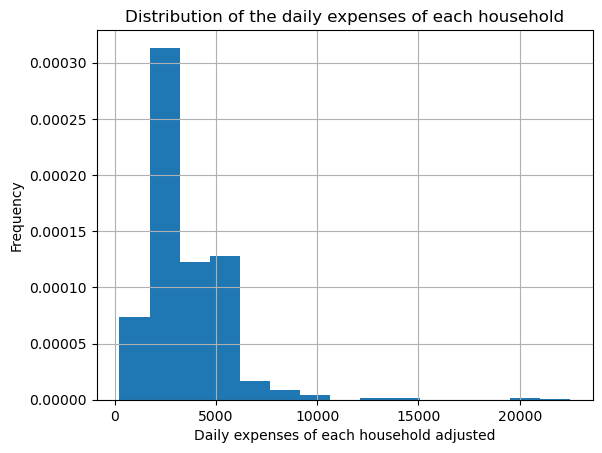

In [61]:
# histogram of adjusted daily expenses : 
plt.hist(data_merged_final['adjusted_d_e'], bins=15, density=True)
plt.xlabel('Daily expenses of each household adjusted')
plt.ylabel('Frequency')
plt.title('Distribution of the daily expenses of each household')
plt.grid(True)

# print
plt.show()

#### 3.2.2 <a id='toc3_2_2'></a>[Distribution of daily expenses adjusted across gender of household head](#toc0_)

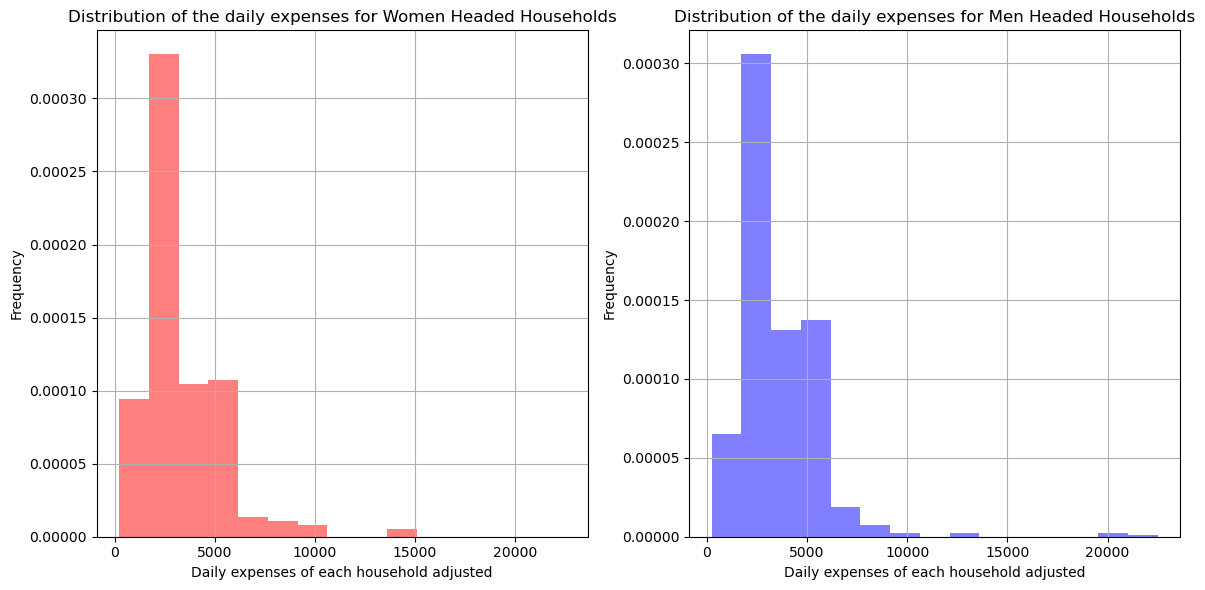

In [91]:
# divide data for each gender : 
female_data = data_merged_final[data_merged_final['gender_household_head'] == 'Female']
male_data = data_merged_final[data_merged_final['gender_household_head'] == 'Male']

# we add a limit here to get the same scale : 
min_value = min(female_data['adjusted_d_e'].min(), male_data['adjusted_d_e'].min())
max_value = max(female_data['adjusted_d_e'].max(), male_data['adjusted_d_e'].max())

plt.figure(figsize=(12, 6))

# subplot for women : 
plt.subplot(1, 2, 1)
plt.hist(female_data['adjusted_d_e'], bins=15, density=True, color='red', alpha=0.5, range=(min_value, max_value))
plt.xlabel('Daily expenses of each household adjusted')
plt.ylabel('Frequency')
plt.title('Distribution of the daily expenses for Women Headed Households')
plt.grid(True)

# subplot for men : 
plt.subplot(1, 2, 2)
plt.hist(male_data['adjusted_d_e'], bins=15, density=True, color='blue', alpha=0.5, range=(min_value, max_value))
plt.xlabel('Daily expenses of each household adjusted')
plt.ylabel('Frequency')
plt.title('Distribution of the daily expenses for Men Headed Households')
plt.grid(True)

# print : 
plt.tight_layout()
plt.show()

#### 3.2.3 <a id='toc3_2_3'></a>[Distribution of daily expenses adjusted across gender of household head controlling the number of members in household](#toc0_)

In [86]:
# we need to also adjust the daily expenses on the number of household members :
data_merged_final['adjusted_d_e_per_member'] = data_merged_final['adjusted_d_e']/data_merged_final['nb_mbr_hh']

# checking : 
data_merged_final

,household_id,individual_id,gender_household_head,nb_mbr_hh,amount_of_daily_expenses,frequency,adjusted_d_e,adjusted_d_e_per_member
0,11101.0,1110101.0,Female,11.0,5000,Per day,5000.0,454.545455
1,11102.0,1110201.0,Female,25.0,9000,Per day,9000.0,360.000000
2,11103.0,1110301.0,Male,19.0,4500,Per day,4500.0,236.842105
3,11104.0,1110401.0,Female,17.0,3000,Per day,3000.0,176.470588
4,11105.0,1110501.0,Male,14.0,5000,Per day,5000.0,357.142857
...,...,...,...,...,...,...,...,...
788,94506.0,9460501.0,Male,7.0,1500,Per day,1500.0,214.285714
789,94509.0,9460601.0,Female,7.0,1500,Per day,1500.0,214.285714
790,94512.0,9460901.0,Male,6.0,3000,Per day,3000.0,500.000000
791,94601.0,9461001.0,Male,17.0,3000,Per day,3000.0,176.470588


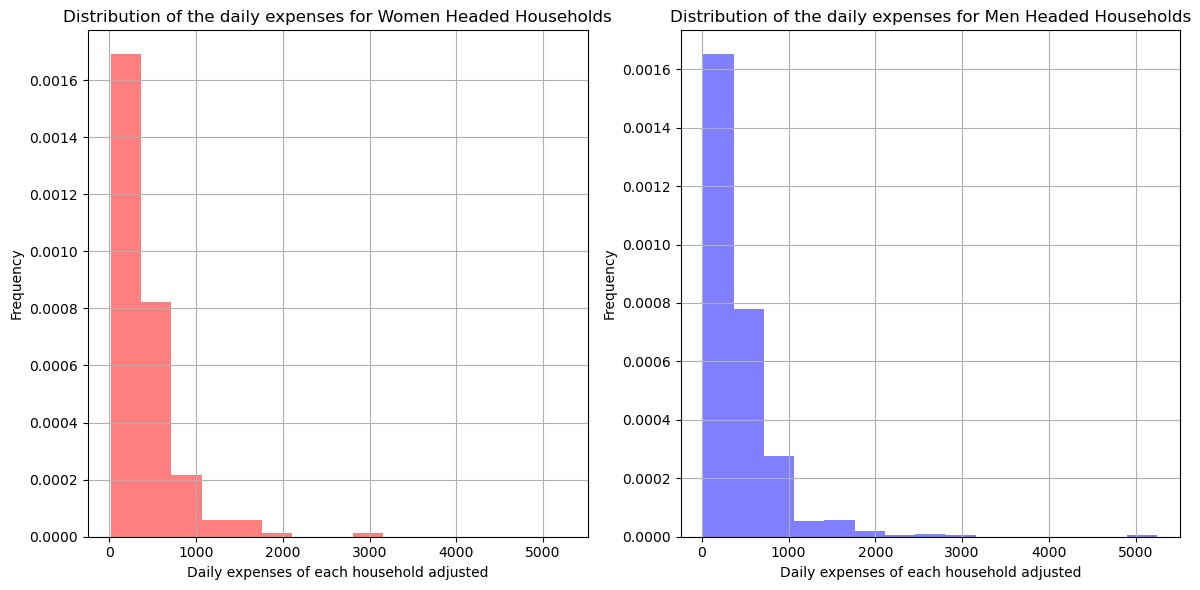

In [90]:
# divide data for each gender : 
female_data = data_merged_final[data_merged_final['gender_household_head'] == 'Female']
male_data = data_merged_final[data_merged_final['gender_household_head'] == 'Male']

# we add a limit here to get the same scale : 
min_value = min(female_data['adjusted_d_e_per_member'].min(), male_data['adjusted_d_e_per_member'].min())
max_value = max(female_data['adjusted_d_e_per_member'].max(), male_data['adjusted_d_e_per_member'].max())

plt.figure(figsize=(12, 6))

# subplot for women : 
plt.subplot(1, 2, 1)
plt.hist(female_data['adjusted_d_e_per_member'], bins=15, density=True, color='red', alpha=0.5, range=(min_value, max_value))
plt.xlabel('Daily expenses of each household adjusted')
plt.ylabel('Frequency')
plt.title('Distribution of the daily expenses for Women Headed Households')
plt.grid(True)

# subplot for men : 
plt.subplot(1, 2, 2)
plt.hist(male_data['adjusted_d_e_per_member'], bins=15, density=True, color='blue', alpha=0.5, range=(min_value, max_value))
plt.xlabel('Daily expenses of each household adjusted')
plt.ylabel('Frequency')
plt.title('Distribution of the daily expenses for Men Headed Households')
plt.grid(True)

# print : 
plt.tight_layout()
plt.show()

#### 3.2.4 <a id='toc3_2_4'></a>[Distribution of daily expenses : Statistics](#toc0_)

In [98]:
d_e_male = male_data['adjusted_d_e'].describe().round(2)
d_e_female = female_data['adjusted_d_e'].describe().round(2)

# create a dataframe for the men's statistics :
df_male_stats = pd.DataFrame(d_e_male)
df_male_stats.columns = ['Male Statistics']

# create a dataframe for the women's statistics :
df_female_stats = pd.DataFrame(d_e_female)
df_female_stats.columns = ['Female Statistics']

# combine the two : 
df_combined_stats = pd.concat([df_male_stats, df_female_stats], axis=1)

# print : 
df_combined_stats


,Male Statistics,Female Statistics
count,540.00,251.00
mean,3566.78,3365.12
std,2163.75,1976.28
min,233.33,1000.00
25%,2000.00,2000.00
50%,3000.00,3000.00
75%,5000.00,4000.00
max,22500.00,15000.00


In [99]:
d_e_male = male_data['adjusted_d_e_per_member'].describe().round(2)
d_e_female = female_data['adjusted_d_e_per_member'].describe().round(2)

# create a dataframe for the men's statistics :
df_male_stats = pd.DataFrame(d_e_male)
df_male_stats.columns = ['Male Statistics']

# create a dataframe for the women's statistics :
df_female_stats = pd.DataFrame(d_e_female)
df_female_stats.columns = ['Female Statistics']

# combine the two : 
df_combined_stats = pd.concat([df_male_stats, df_female_stats], axis=1)

# print 
df_combined_stats

,Male Statistics,Female Statistics
count,540.00,251.00
mean,435.69,411.88
std,433.14,357.65
min,15.56,38.46
25%,181.82,193.38
50%,313.39,307.69
75%,500.00,500.00
max,5250.00,3000.00
